In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PC_SL import *

In [3]:
df_asia = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat")
df_child = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\child.dat")
df_insurance = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\insurance.dat")
df_water = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\Water_1000.dat")
df_alarm = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat")
df_barley = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat")
df_hailfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hailfinder.dat")
df_hepar2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hepar2.dat")
df_andes = csv_format_discrete(r"C:\Users\Upsilonser\Documents\GitHub\ML_FYP\dataset\andes.dat")
df_link = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link.dat")
df_pathfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\pathfinder.dat")
df_munin2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\munin2.dat")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Upsilonser\\Documents\\GitHub\\ML_FYP\\dataset\\andes.dat'

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 19
**********
BN has score -22466.396546491495
**********
Eight<-Six,Three -4150.291729106073
Six<-Five,Two -5.611578690688475
Three<-One -6425.369680905482
Five<- -637.1389375744329
Four<-Five -524.4552285079117
One<-Two -6673.4355503353145
Two<- -2168.641652909864
Seven<-Six -1881.452188461728
**********
bnlearn modelstring = 
[Eight|Six:Three][Six|Two:Five][Three|One][Five][Four|Five][One|Two][Two][Seven|Six]
**********
CPDAG:
Vertices: Eight,Six,Three,Five,Four,One,Two,Seven
Six->Eight
Six->Seven
Three->Eight
Five-Four
Five->Six
One-Three
Two-One
Two->Six



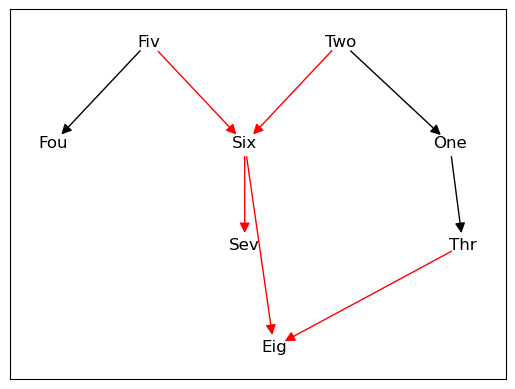

the time taken to learn the network is: 0.7065212726593018 seconds
False Positive =  []
False Negative =  []
the F-score is 1.0
CPU times: total: 703 ms
Wall time: 707 ms


In [98]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_0 = Gobnilp()
k = PC_SL(df_asia, 1, 0.01)
for i in k:
    j_0.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_0.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_0))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 593
**********
BN has score -105226.51191678003
**********
ANAPHYLAXIS<- -578.587070487134
ARTCO2<-VENTALV -1816.018107669981
VENTALV<-INTUBATION,VENTLUNG -1785.1568955858384
BP<-CO,TPR -4927.804606748883
TPR<-ANAPHYLAXIS -10794.813215814676
CO<-HR,STROKEVOLUME -2678.9117199075117
CATECHOL<-ARTCO2,TPR -1521.301873422577
STROKEVOLUME<-HYPOVOLEMIA,LVFAILURE -4437.288938131547
HR<-CATECHOL -3744.599767304855
CVP<-LVEDVOLUME -3006.615302132195
LVEDVOLUME<-HYPOVOLEMIA,LVFAILURE -3613.5057310384145
DISCONNECT<- -3295.031743080661
ERRCAUTER<- -3222.5768222310726
ERRLOWOUTPUT<- -1972.2788189759885
EXPCO2<-ARTCO2,VENTLUNG -1772.659127224848
VENTLUNG<-INTUBATION,KINKEDTUBE,VENTTUBE -3618.0085247885727
FIO2<- 

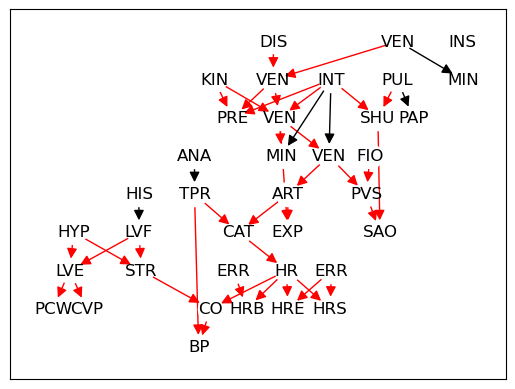

the time taken to learn the network is: 22.732929944992065 seconds
False Positive =  [['ARTCO2', 'CATECHOL'], ['HRSAT', 'HR']]
False Negative =  [['INTUBATION', 'MINVOL'], ['KINKEDTUBE', 'VENTLUNG']]
the F-score is 0.9523809523809523
CPU times: total: 23.1 s
Wall time: 22.7 s


In [9]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_1 = Gobnilp()
k = PC_SL(df_alarm, 1, 0.05)
for i in k:
    j_1.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_1.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_1))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 19
**********
BN has score -22466.396546491495
**********
Eight<-Six,Three -4150.291729106073
Six<-Five,Two -5.611578690688475
Three<-One -6425.369680905482
Five<- -637.1389375744329
Four<-Five -524.4552285079117
One<-Two -6673.4355503353145
Two<- -2168.641652909864
Seven<-Six -1881.452188461728
**********
bnlearn modelstring = 
[Eight|Six:Three][Six|Two:Five][Three|One][Five][Four|Five][One|Two][Two][Seven|Six]
**********
CPDAG:
Vertices: Eight,Six,Three,Five,Four,One,Two,Seven
Six->Eight
Six->Seven
Three->Eight
Five-Four
Five->Six
One-Three
Two-One
Two->Six



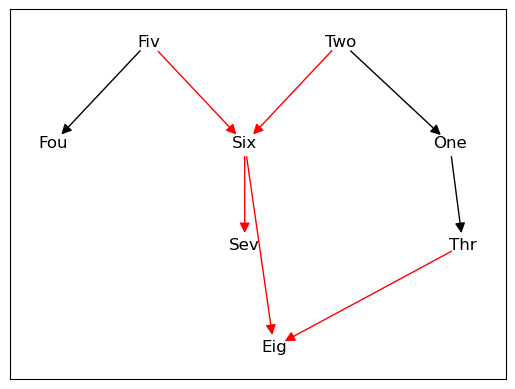

the time taken to learn the network is: 0.8032474517822266 seconds
False Positive =  []
False Negative =  []
the F-score is 1.0
CPU times: total: 812 ms
Wall time: 803 ms


In [107]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_2 = Gobnilp()
k = PC_SL(df_asia, 1, 0.10)
for i in k:
    j_2.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_2.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_2))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 17
**********
BN has score -22466.396546491495
**********
Eight<-Six,Three -4150.291729106073
Six<-Five,Two -5.611578690688475
Three<- -6901.1493808303785
Five<- -637.1389375744329
Four<-Five -524.4552285079117
One<-Three -6460.081285708176
Seven<-Six -1881.452188461728
Two<-One -1906.2162176121055
**********
bnlearn modelstring = 
[Eight|Six:Three][Six|Two:Five][Three][Five][Four|Five][One|Three][Seven|Six][Two|One]
**********
CPDAG:
Vertices: Eight,Six,Three,Five,Four,One,Seven,Two
Six->Eight
Six->Seven
Three->Eight
Three-One
Five-Four
Five->Six
One-Two
Two->Six



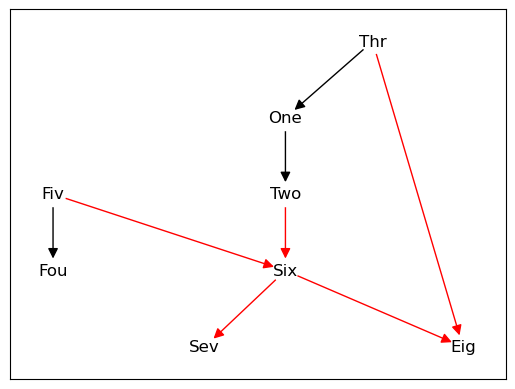

the time taken to learn the network is: 0.7046942710876465 seconds
False Positive =  []
False Negative =  []
the F-score is 1.0
CPU times: total: 688 ms
Wall time: 705 ms


In [108]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_3 = Gobnilp()
k = PC_SL(df_asia, 1, 0.20)
for i in k:
    j_3.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_3.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_3))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 16
**********
BN has score -22466.396546491495
**********
Eight<-Six,Three -4150.291729106073
Six<-Five,Two -5.611578690688475
Three<- -6901.1493808303785
Five<-Four -633.8404777927353
Four<- -527.7536882896093
One<-Three -6460.081285708176
Seven<-Six -1881.452188461728
Two<-One -1906.2162176121055
**********
bnlearn modelstring = 
[Eight|Six:Three][Six|Two:Five][Three][Five|Four][Four][One|Three][Seven|Six][Two|One]
**********
CPDAG:
Vertices: Eight,Six,Three,Five,Four,One,Seven,Two
Six->Eight
Six->Seven
Three->Eight
Three-One
Five->Six
Four-Five
One-Two
Two->Six



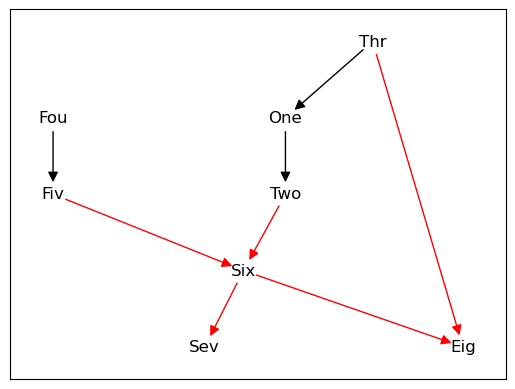

the time taken to learn the network is: 0.879765510559082 seconds
False Positive =  []
False Negative =  []
the F-score is 1.0
CPU times: total: 859 ms
Wall time: 880 ms


In [102]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_4 = Gobnilp()
k = PC_SL(df_asia, 1, 0.30)
for i in k:
    j_4.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_4.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_4))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 13
**********
BN has score -22466.396546491495
**********
Eight<-Six,Three -4150.291729106073
Six<-Five,Two -5.611578690688475
Three<- -6901.1493808303785
Five<- -637.1389375744329
Four<-Five -524.4552285079117
One<-Three -6460.081285708176
Seven<-Six -1881.452188461728
Two<-One -1906.2162176121055
**********
bnlearn modelstring = 
[Eight|Six:Three][Six|Two:Five][Three][Five][Four|Five][One|Three][Seven|Six][Two|One]
**********
CPDAG:
Vertices: Eight,Six,Three,Five,Four,One,Seven,Two
Six->Eight
Six->Seven
Three->Eight
Three-One
Five-Four
Five->Six
One-Two
Two->Six



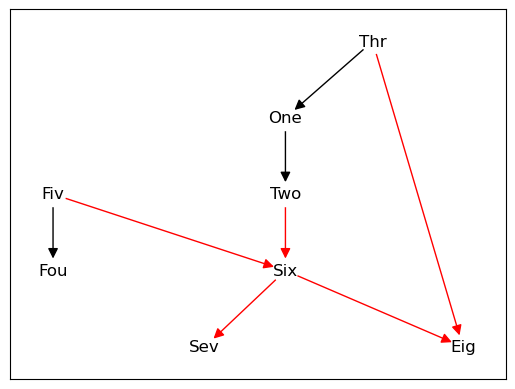

the time taken to learn the network is: 0.9606912136077881 seconds
False Positive =  []
False Negative =  []
the F-score is 1.0
CPU times: total: 1.12 s
Wall time: 961 ms


In [103]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_5 = Gobnilp()
k = PC_SL(df_asia, 1, 0.40)

for i in k:
    j_5.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_5.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_5))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 11
**********
BN has score -22466.396546491495
**********
Eight<-Six,Three -4150.291729106073
Six<-Five,Two -5.611578690688475
Three<-One -6425.369680905482
Five<-Four -633.8404777927353
Four<- -527.7536882896093
One<- -6935.860985633073
Seven<-Six -1881.452188461728
Two<-One -1906.2162176121055
**********
bnlearn modelstring = 
[Eight|Six:Three][Six|Two:Five][Three|One][Five|Four][Four][One][Seven|Six][Two|One]
**********
CPDAG:
Vertices: Eight,Six,Three,Five,Four,One,Seven,Two
Six->Eight
Six->Seven
Three->Eight
Five->Six
Four-Five
One-Three
One-Two
Two->Six



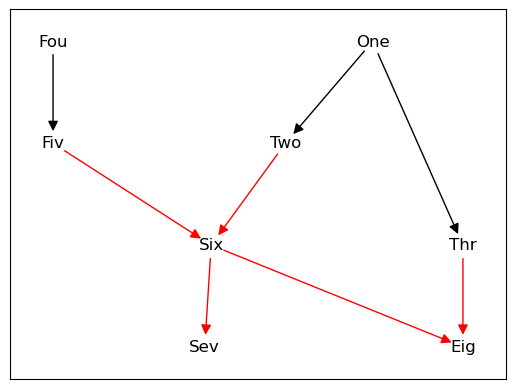

the time taken to learn the network is: 1.0212550163269043 seconds
False Positive =  []
False Negative =  []
the F-score is 1.0
CPU times: total: 1.17 s
Wall time: 1.02 s


In [104]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_6 = Gobnilp()
k = PC_SL(df_asia, 1, 0.50)

for i in k:
    j_6.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_6.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_6))

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-21
Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -105226.51191678003
**********
ANAPHYLAXIS<- -578.587070487134
ARTCO2<-VENTALV -1816.018107669981
VENTALV<-INTUBATION,VENTLUNG -1785.1568955858384
BP<-CO,TPR -4927.804606748883
TPR<-ANAPHYLAXIS -10794.813215814676
CO<-HR,STROKEVOLUME -2678.9117199075117
CATECHOL<-ARTCO2,TPR -1521.301873422577
STROKEVOLUME<-HYPOVOLEMIA,LVFAILURE -4437.288938131547
HR<-CATECHOL -3744.599767304855
CVP<-LVEDVOLUME -3006.615302132195
LVEDVOLUME<-HYPOVOLEMIA,LVFAILURE -3613.5057310384145
DISCONNECT<- -3295.031743080661
ERRCAUTER<- -3222.5768222310726
ERRLOWOUTPUT<- -1972.2788189759885
EXPCO2<-ARTCO2,VENTLUNG -1772.659127224848
VENTLUNG<-INTUBAT

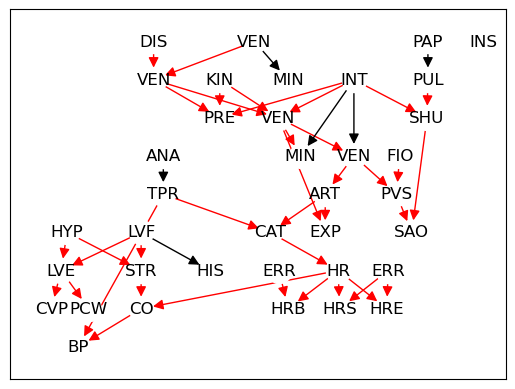

the time taken to learn the network is: 150.38620495796204 seconds
CPU times: total: 7min 50s
Wall time: 2min 30s


In [4]:
%%time
toc = time.time()

'''
score-based algorithm
'''
T = Gobnilp()
#score phase##
T.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')

In [5]:
k = [j_0, j_1, j_2, j_3, j_4, j_5, j_6]
for i in k:
    print(F_score(i))

NameError: name 'j_0' is not defined

In [6]:
def F_score(u):
    #j_0#
    '''
    u = hybrid graph
    v = real graph
    '''
    u_frozenset = []
    for i in u.adjacency.items():
        if i[1].X >= 1:
            u_frozenset.append(i[0])
    hybrid = [list(x) for x in u_frozenset]
    ##
    
    T_frozenset = []
    for i in T.adjacency.items():
        if i[1].X >= 1:
            T_frozenset.append(i[0])
    real = [list(x) for x in T_frozenset]
    
    #Finding TP, FP, FN#
    TP = [x for x in hybrid if x in (y for y in real)]
    FP = [x for x in hybrid if x not in (y for y in real)]
    FN = [x for x in real if x not in (y for y in hybrid)]
    
    # F_score#
    F_score = (2 * len(TP)) / (2 * len(TP) + len(FP) + len(FN))
    print('False Positive = ' ,FP)
    print('False Negative = ' ,FN)
    return F_score

In [38]:
F_score(j_0)

False Positive =  [['LungParench', 'HypoxiaInO2']]
False Negative =  []


0.9795918367346939